# Цель проекта: предварительный анализ данных по влиянию условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике для раннего выявления студентов, находящихся в группе риска.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.csv')
display(df.head(10))
df.info()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
df.rename({'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu', 'Mjob': 'mjob',
           'Fjob': 'fjob',  'studytime, granular': 'studytime_granular'}, axis=1, inplace=True)
#для удобства переименовываем столбцы в нижний регистр

In [3]:
# определяем функцию для очистки строковых столбцов:
# так как их интервал значений подробно описан, это можо сделать автоматически

# col_list_str - это список строковых столбцов и их значений
col_list_str = {'school': ['GP', 'MS'],
                'sex': ['F', 'M'],
                'address': ['U', 'R'],
                'famsize': ['LE3', 'GT3'],
                'pstatus': ['T', 'A'],
                'mjob': ['teacher', 'health', 'services', 'at_home', 'other'],
                'fjob': ['teacher', 'health', 'services', 'at_home', 'other'],
                'reason': ['home', 'reputation', 'course', 'other'],
                'guardian': ['mother', 'father', 'other'],
                'schoolsup': ['yes', 'no'],
                'paid': ['yes', 'no'],
                'activities': ['yes', 'no'],
                'nursery': ['yes', 'no'],
                'higher': ['yes', 'no'],
                'internet': ['yes', 'no'],
                'romantic': ['yes', 'no']
                }

#очистки строковых значений от пропусков
def str_col_clean(col):
    if col in col_list_str:
        for i in range(len(df.index)):
            if df[col].values[i] not in col_list_str[col]:
                df.loc[i, col] = None
                # если значение в ячейке столбца не совпадаем с описаным для данного столбца,
                # оно заменяется на None


# Boxplot для категориальных значений
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
    
                
#Тест Стьюдента:                
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
# список "цифровых" столбцов:
col_list_num = ['age', 'medu', 'fedu', 'traveltime', 'studytime',
                'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']

In [4]:
for c in col_list_str.keys():
    str_col_clean(c)

# "прочёсываем" строковые столбцы и зменяем нетипичные и пропущеные значения на None

In [5]:
#выборочная проверка - появились-ли None в значениях
display(df.paid.unique())
display(df.internet.unique())
display(df.romantic.unique())

display(pd.DataFrame(df.fedu.value_counts()))
df.loc[:, ['fedu']].info()
display(df.fedu.unique())

array(['no', None, 'yes'], dtype=object)

array([None, 'yes', 'no'], dtype=object)

array(['no', None, 'yes'], dtype=object)

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([ 4.,  1.,  2.,  3., 40., nan,  0.])

## Анализ "цифровых" столбцов

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

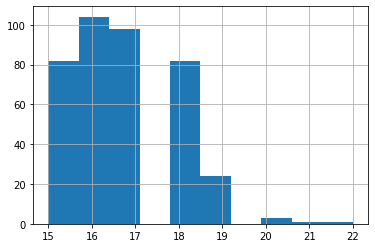

In [6]:
df.age.hist()
df.age.describe()
#в распределении возраста учащиееся 20-22 лет выглядят как выбросы, однако мы не можем исключать эти данне,
#так как задача поставлена так: отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет 
#на их успеваемость по математике

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

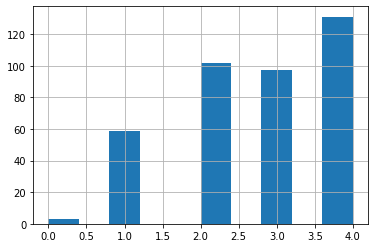

In [7]:
df.medu.hist()
df.medu.describe()

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

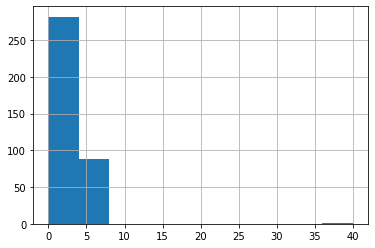

In [8]:
df.fedu.hist()
df.fedu.describe()

#присутствует нерегламентное значение "выброс" - 40
#8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [9]:
# "отфильтровываем" выброс в данных об образовании отца, так как не понятно - опечатка-ли это или что-то ещё
# мне кажется, что это банальная опечатка и значение должно быть равно 4.
df['fedu'][11] = 4.0


C:\Users\java\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

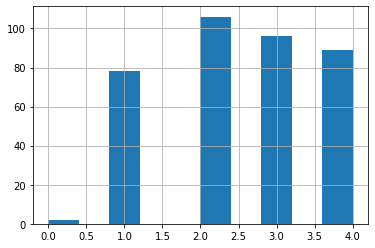

In [10]:
df.fedu.hist()
df.fedu.describe()

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

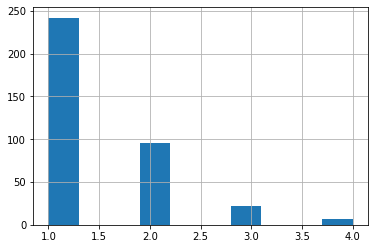

In [11]:
df.traveltime.hist()
df.traveltime.describe()
# здесь всё хорошо.

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

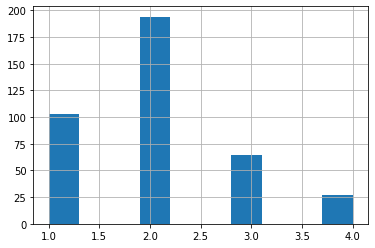

In [12]:
df.studytime.hist()
df.studytime.describe()
# с данными этого столбца всё в порядке.

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

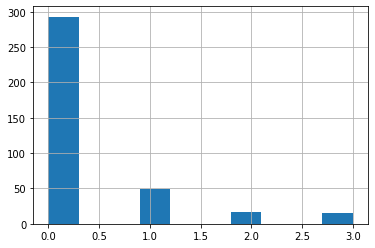

In [13]:
df.failures.hist()
df.failures.describe()
# значения столбца failures сответствует описанию. 

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

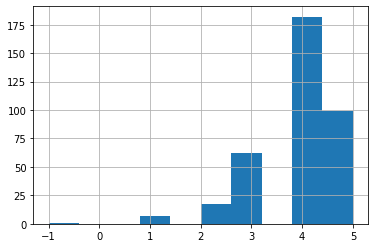

In [14]:
df.famrel.hist()
df.famrel.describe()

#есть неверные значения: ""-1". Мне кажется это банальная опечатка при вводе значений.
#24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

C:\Users\java\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

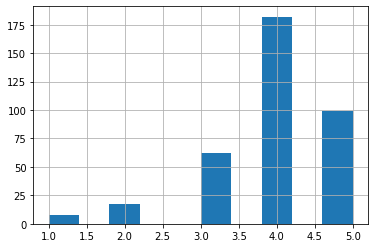

In [15]:
df['famrel'][25] = 1.0
df.famrel.hist()
df.famrel.describe()

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

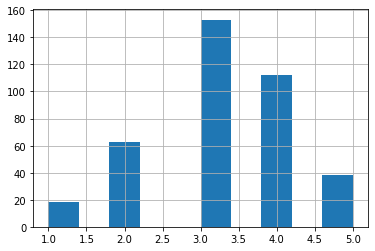

In [16]:
df.freetime.hist()
df.freetime.describe()

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

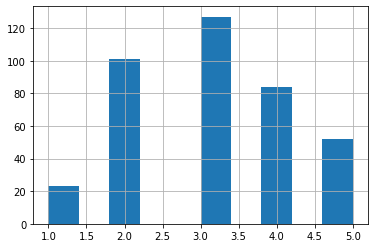

In [17]:
df.goout.hist()
df.goout.describe()

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

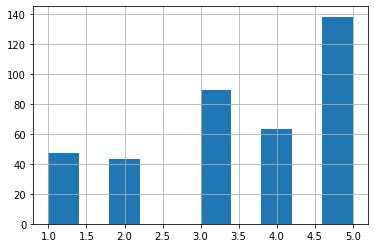

In [18]:
df.health.hist()
df.health.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

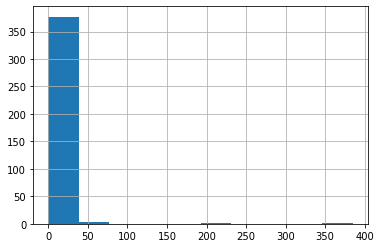

In [19]:
df.absences.hist()
df.absences.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

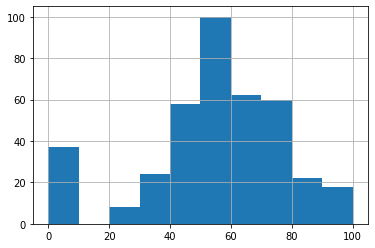

In [20]:
df.score.hist()
df.score.describe()

## на гистогрмме значений столбца score заметно, что минимальные баллы заметно выбиваются из нормального распределения. Однако это баллы по госэкзамену по математике, и их нельзя исключать из данных.

In [21]:
#анализ пропущенных значений в цифровых столбцах:

for col in col_list_num:
    null_values = df.loc[:, [col]].isnull().sum()
    display(null_values)

# как видно, лишь столбец age не содержит пропусков, все остальные столбцы содержат довольно много пропусков. 

age    0
dtype: int64

medu    3
dtype: int64

fedu    24
dtype: int64

traveltime    28
dtype: int64

studytime    7
dtype: int64

failures    22
dtype: int64

famrel    27
dtype: int64

freetime    11
dtype: int64

goout    8
dtype: int64

health    15
dtype: int64

absences    12
dtype: int64

score    6
dtype: int64

## Корреляционный анализ

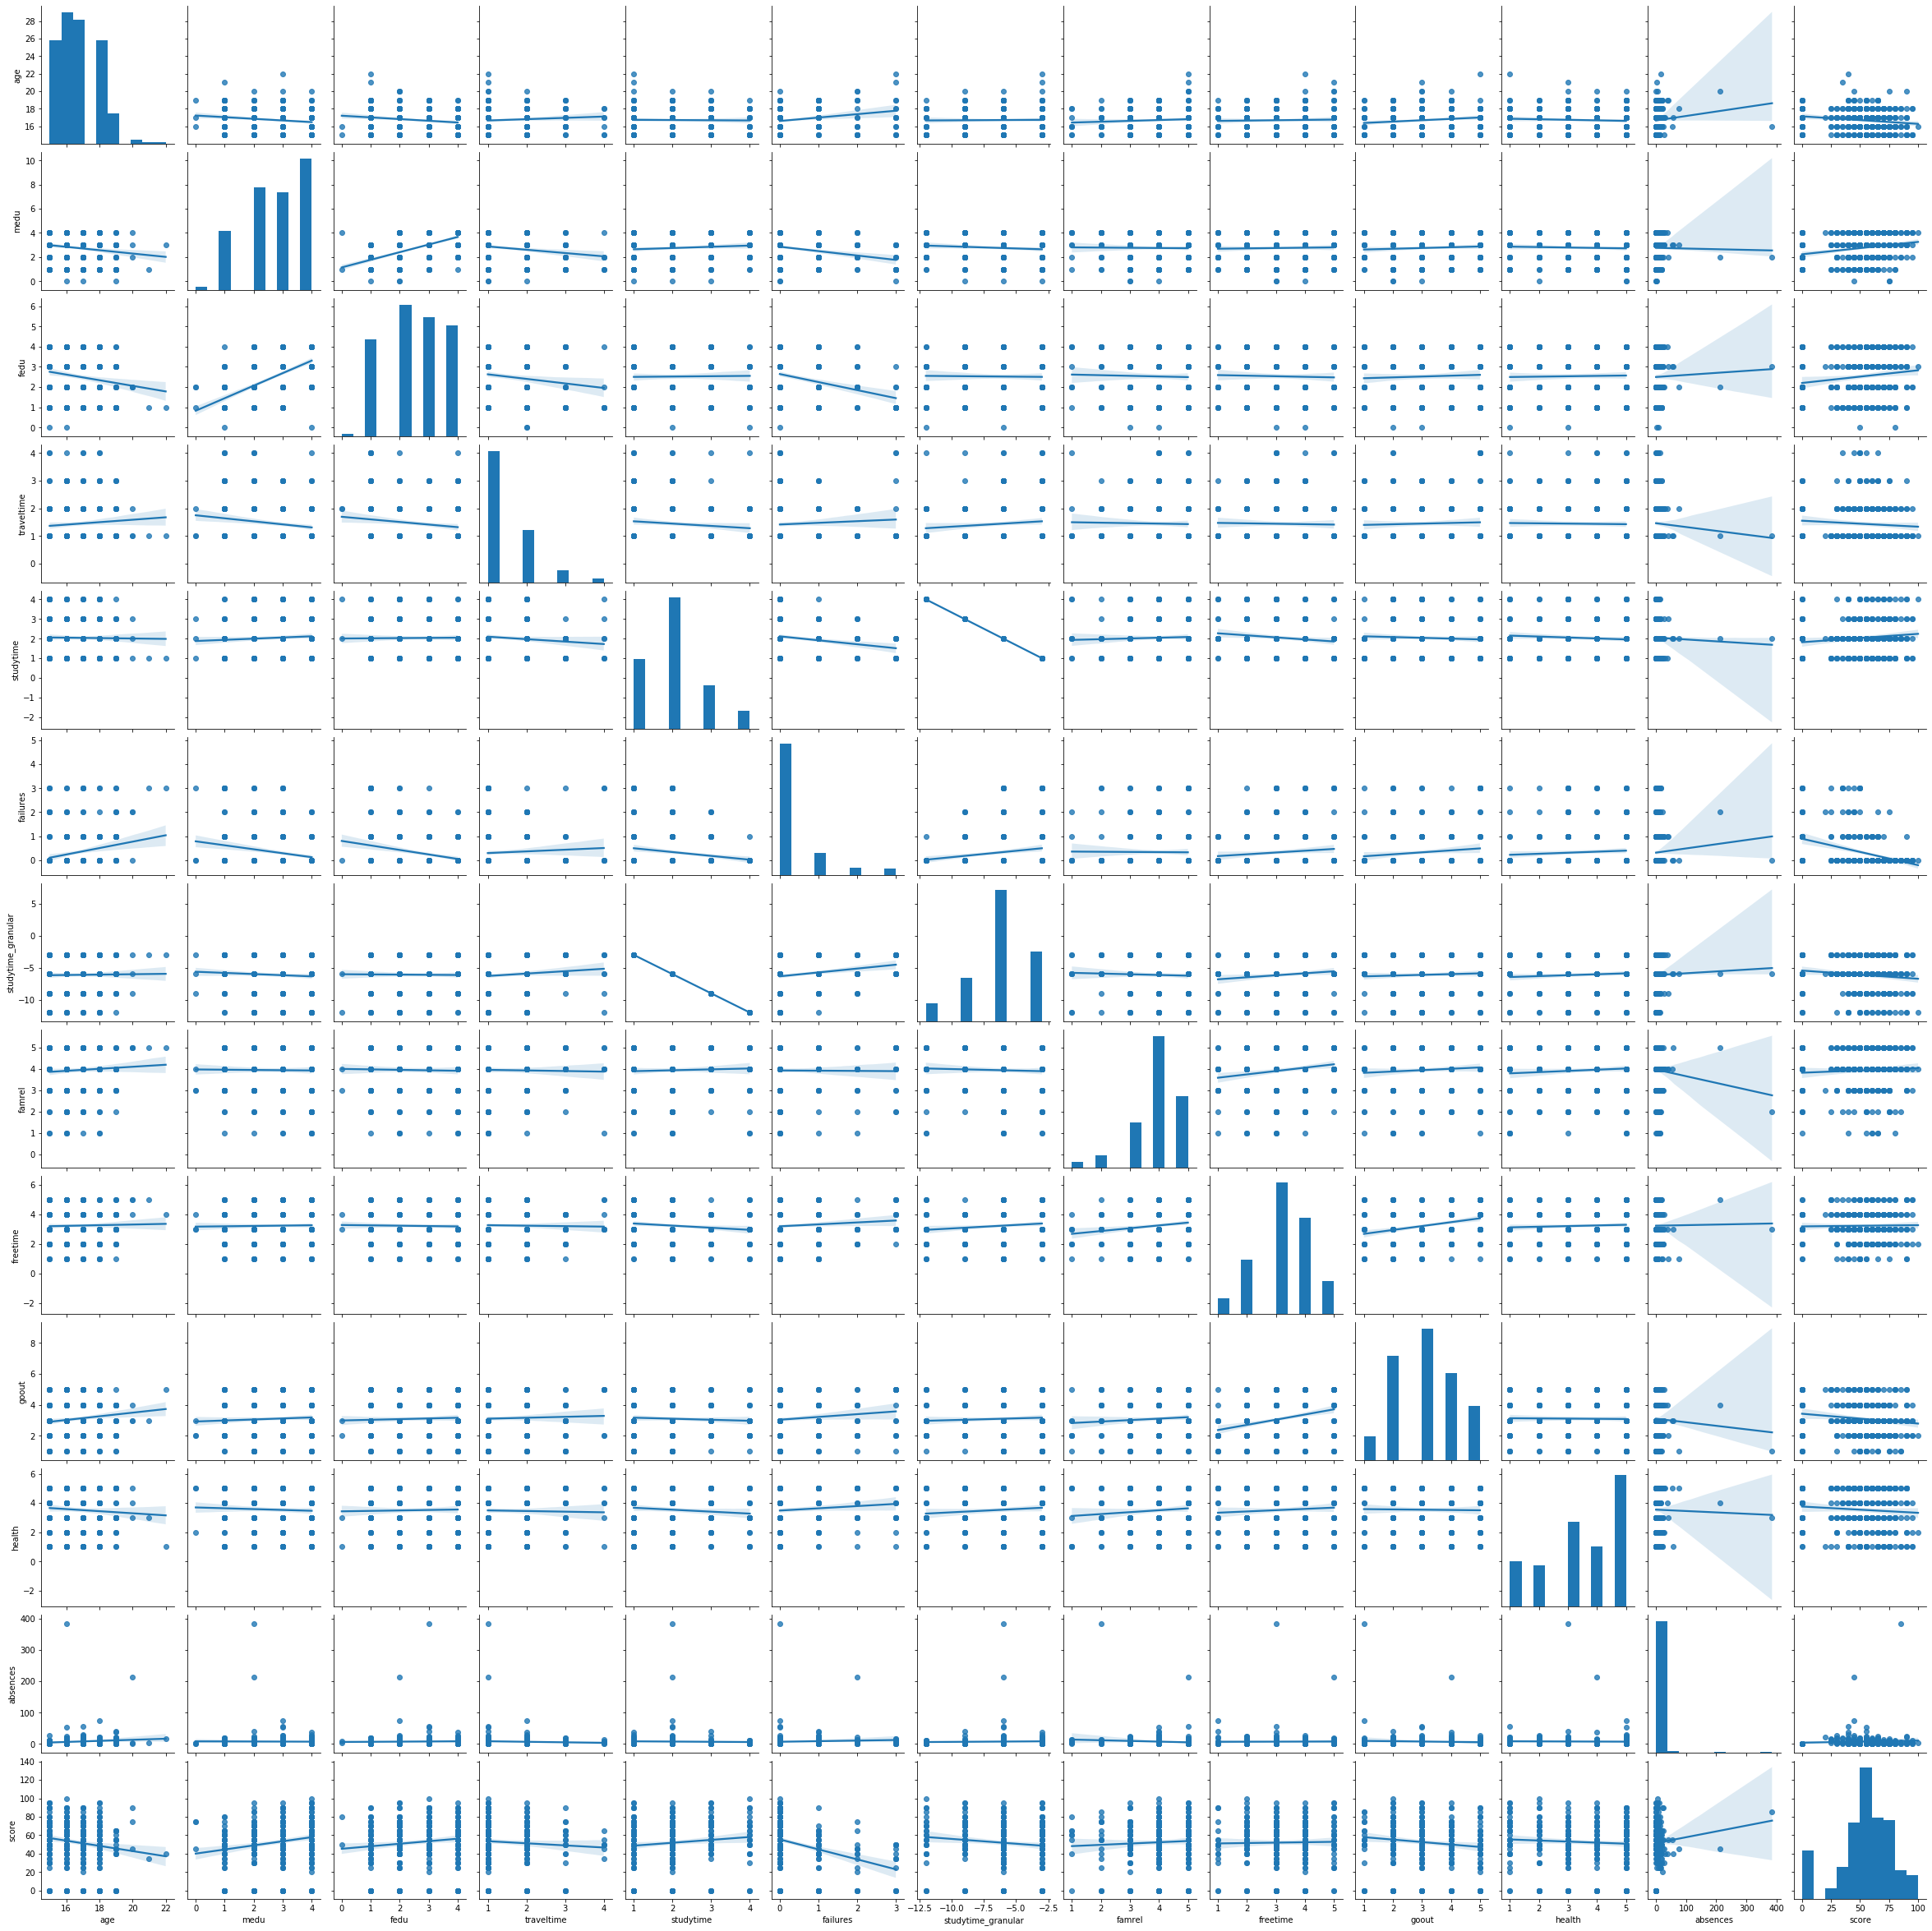

In [22]:
#Корреляционный анализ
sns.pairplot(df, kind = 'reg')

In [23]:
df.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.015556,0.067415,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.078589,-0.014459,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.012896,-0.026122,-0.025892,0.042663,0.023862,0.022572,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,0.102206,-0.021542,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,-1.000000,0.039555,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.178992,-0.009110,0.098382,0.120914,0.081284,0.057391,-0.344338
studytime_granular,0.015556,-0.078589,-0.012896,0.102206,-1.000000,0.178992,1.000000,-0.039555,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,-0.039555,1.000000,0.172751,0.077167,0.086309,-0.083064,0.055305
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.121969,0.172751,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.051280,0.077167,0.296437,1.000000,-0.015608,-0.048738,-0.129685


### Заметны следующие корреляции:
 - явно негативная с возрастом, age
 - выраженно позитивная с образованием матери, medu
 - позитивная с образованием отца, fedu
 - негативная со временем в пути до школы, traveltime
 - позитивная со временем на учёбу помимо школы, studytime
 - сильно выраженная негативная с количеством внеучебных неудач ,failures
 
 - негативная с параметром "studytime, granular", однако эти данные не описаны. 
    корр. полностью совпадает со studytime, но противоположна по знаку
 
 - позитивная с семейными отношениями, famrel
 - не сильная позитивная со свободным временем, freetime
 - явно выражено негативная с проведением времени с друзьями, goout
 - не сильно негативная со здороьем, health
 - не сильно позитивная с пропусками, absences
 
 ### Выбираю столбцы: age, medu, fedu, traveltime, studytime, failures, goout, health

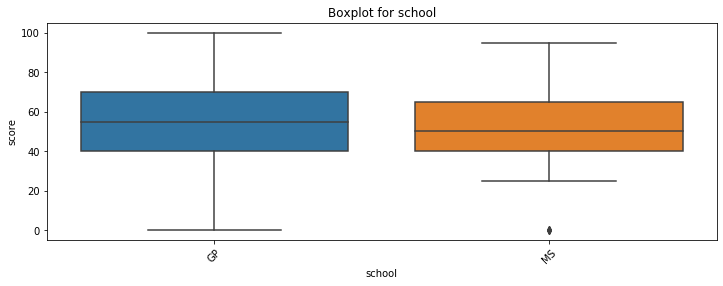

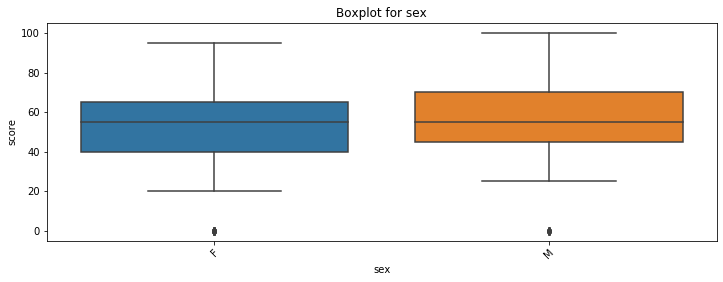

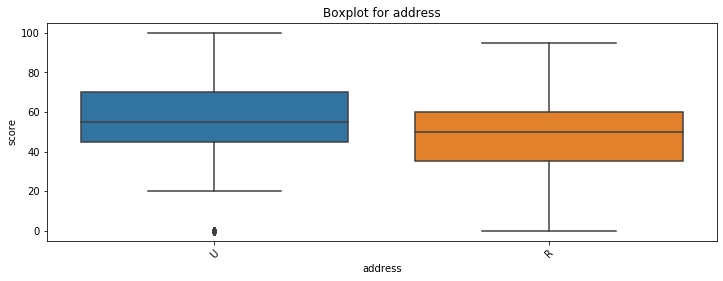

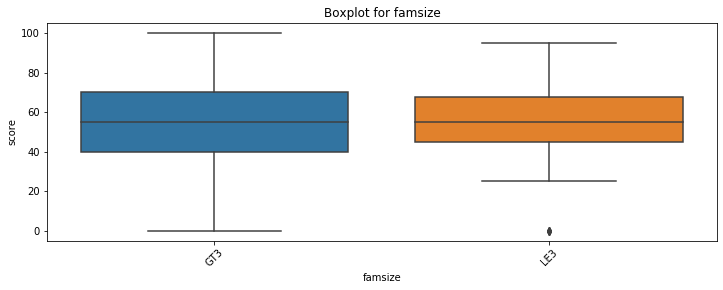

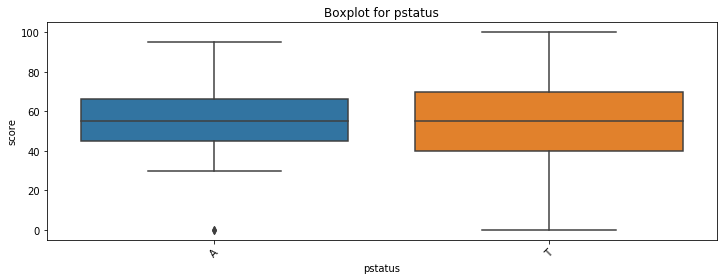

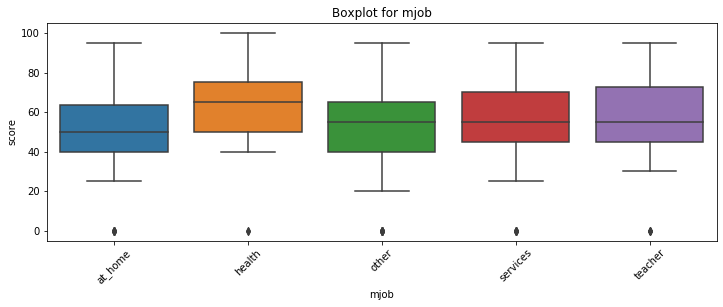

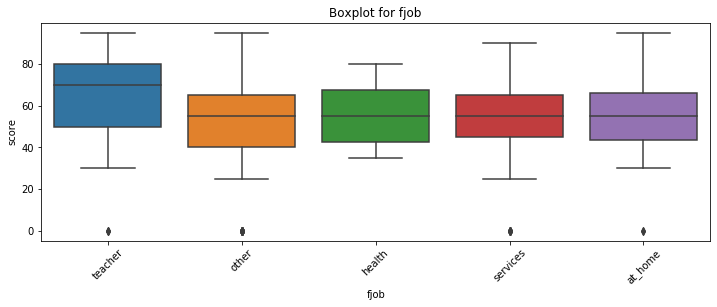

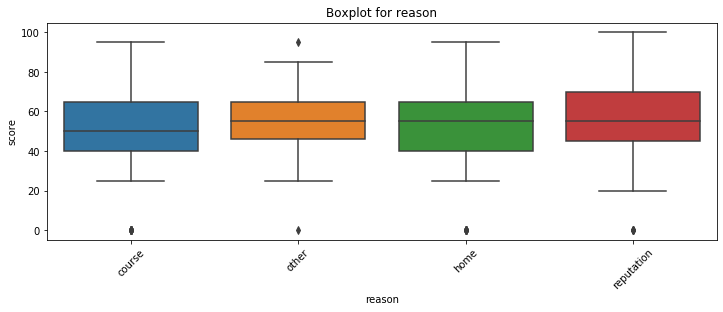

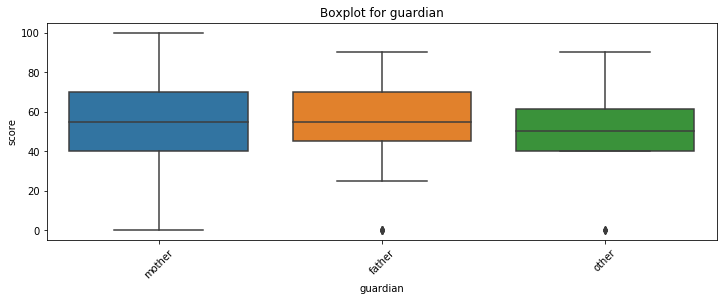

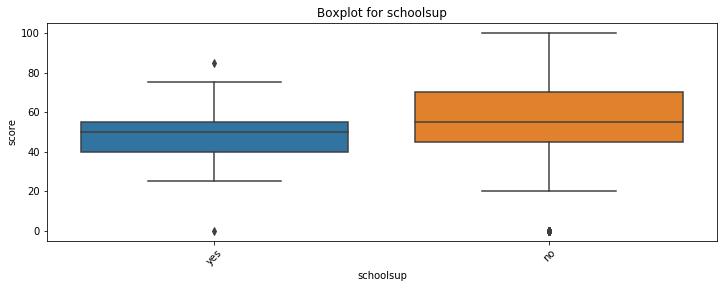

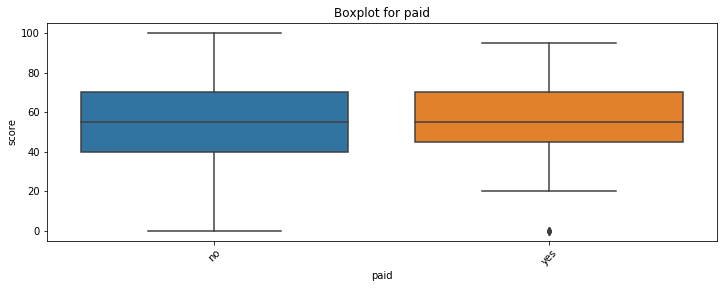

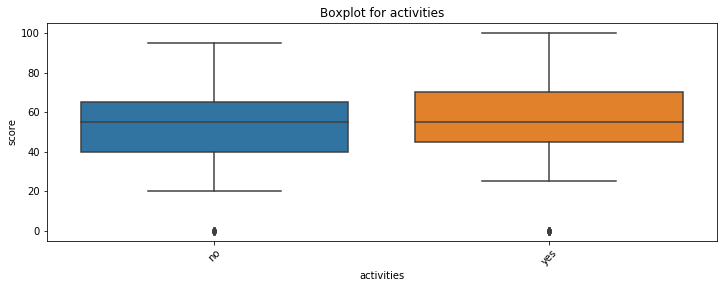

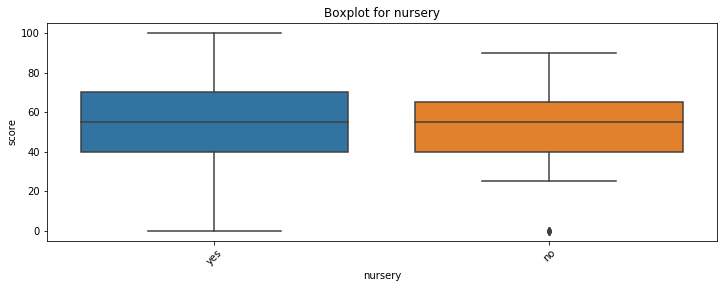

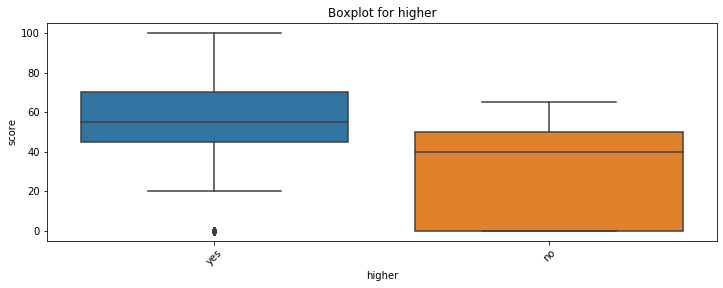

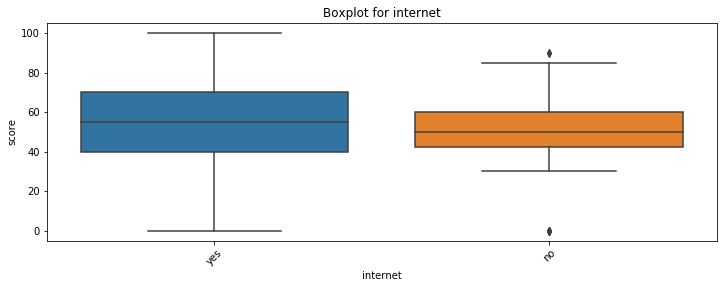

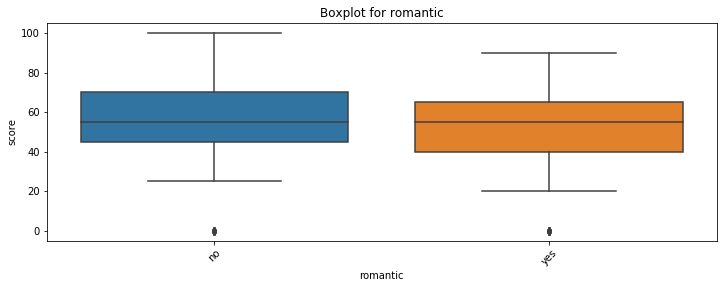

In [24]:
# Boxplot для категориальных столбцов
for col in col_list_str:
    get_boxplot(col)

### Данные выше демонстрируют:
- заметное влияие на успеваемость школы, в которой учится ученик, school -
- ожидаемый разброс в успеваемости девочек и мальчиков, sex - 
- значительное влияние типа адреса ученика ('U' - городской, 'R' - за городом), address ++
- ожидаемый (незначительный) эффект размера семьи на успеваемость, famsize -
- неожиднный эффект статуса совместного жилья родителей ('T' - живут вместе 'A' - раздельно), pstatus +
- значительное влияние работы матери на успеваемость, mjob ++
- так-же заметное влияние работы отца на успеваемость, fjob ++
- некоторое влияние причины выбора школы, reason - 
- широкий разброс успеваемости если опекун - мать. Это интересно и стоит учесть в модели, guardian +
- заметный *обратный!* эффект дополнительной образовательной поддержки, schoolsup +
- дополнительные платные занятия по математике заметно сужают разброс, paid +
- дополнительные внеучебные занятия улучшают показатели, activities -
- сильно выраженый эффект на рзброс успеваемости от посещения детского сада, стоит учесть. nursery +
- ярко выраженный эффект желания получить высшее образование, higher ++
- заметное влияние наличие интернета дома, internet +
- слабое влияние романтических отношений, romantic -

### Выбираю столбцы: address, pstatus, mjob, fjob, guardian, schoolsup, paid, nursery, higher, internet

In [25]:
# тест Стьюдента
# на данном этапе совершенно непонятно как он работает, более того - выдаёт ошибки.
for col in col_list_str:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mjob


C:\Users\java\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\java\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\java\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# Финальный набор данный для последующего анализа:

In [26]:
df_for_model = df.loc[:, ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'goout', 'health',
                          'address', 'pstatus', 'mjob', 'fjob', 'guardian', 'schoolsup', 'paid', 'nursery', 'higher', 'internet']]
df_for_model.head()

,age,medu,fedu,traveltime,studytime,failures,goout,health,address,pstatus,mjob,fjob,guardian,schoolsup,paid,nursery,higher,internet
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,U,A,at_home,teacher,mother,yes,no,yes,yes,None
1,17,1.0,1.0,1.0,2.0,0.0,3.0,3.0,U,None,at_home,other,father,no,no,no,yes,yes
2,15,1.0,1.0,1.0,2.0,3.0,2.0,3.0,U,T,at_home,other,mother,yes,None,yes,yes,yes
3,15,4.0,2.0,1.0,3.0,0.0,2.0,5.0,U,T,health,None,mother,no,yes,yes,yes,yes
4,16,3.0,3.0,1.0,2.0,0.0,2.0,5.0,U,T,other,other,father,no,yes,yes,yes,no
